# Regression Analysis

In this notebook, we see how regression analysis can help to **understand the data behavior**, to **predict data values** (continuous or dichotomous), and to **find important predictors** (sparse models).
We present different regression models: Simple linear regression, Multiple linear regression, Polynomial regression and Logistic regression. 
We evaluate the results qualitatively by means of Seaborn visualization tools and quantitatively by means of Scikit-learn library, as well as other toolboxes.

We use different real data sets:
* Longley dataset of US macroeconomic data
* Prediction of the Price of a New Housing Data Market
* Sea Ice Extent and Climate Change
* Advertising dataset
* Diabetes Scikit-learn dataset
* The Big Mart Sales dataset
* Football team goals

### Contents of the notebook:

- Simple and Multiple Linear Regression and Ordinary Least Squares
- Polynomial regression 
- Visualization (Seaborn)
- Prediction (Scikit-learn)
- Regularization and Sparse models 
- Statistics (StatsModel)
- Logistic Regresion

## How to make predictions about real-world quantities.

+  How does sales volume change with changes in price? How is it affected by weather?
+  How does the amount of a drug absorbed vary with body weight of patient? Does it depend on blood pressure?
+  How many customers can I expect today?
+  At what time should I go home to avoid the traffic jam?
+  What is the chance of rain for next two Mondays? What is the expected temperature?

<center><img src="files/images/crystal_ball_s.jpg"></center>

### Example:
    
 
<center><img src="files/images/life-expectancy-vs-gdp-per-capita.png"></center>


You can find another interesting example [here](https://ourworldindata.org/grapher/life-expectancy-of-women-vs-life-expectancy-of-women?tab=chart&country=&region=World).


Before starting, we can define some settings for the notebook:

In [63]:
import matplotlib.pylab as plt
%matplotlib inline 

In [64]:
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [65]:
import numpy as np

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

### Notation

$x_i$ element of a vector, $\textbf{x}$ column vector, $\textbf{x'}$ (transpose of $\textbf{x}$) row vector, $X$ matrix.

### From Data to Models

All these questions have a common structure: we are asking about one variable $\textbf{y}$ (*response*) that can be expressed as a combination of one or more (independent) variables $\textbf{x}_i$ (commonly called *covariates* or *predictors* or *regressors*).

The role of regression is to build a model (formula) to predict the response from the covariates.

## Linear Regression Model

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the covariates $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} + \epsilon $$ 

The $a_i$ are termed *parameters* of the model or *coefficients* and $\epsilon$ is called *error term*, *disturbance term*, or *noise* (in contrast with the "signal" provided by the rest of the model). This variable captures all other factors which influence the dependent variable $ \textbf{y}$ other than the predictors $ \textbf{x}$. The relationship between the error term and the predictors, for example their correlation, is a crucial consideration in formulating a linear regression model, as it will determine the appropriate estimation method (e.g. ordinary least squares or generalized least squares).

This equation can be rewritten in a more compact (matricial) form as

$$ \textbf{y}  = X \textbf{w} + \epsilon $$

where $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),  \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) 
 \epsilon = \left( \begin{array}{c} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_m \end{array} \right) $$
 
 **Linear regression** is the technique for creating linear models.
 
In the **simple** linear regression, with a single variable, we describe the relationship between the predictor and the response with a straight line. 

The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 + \epsilon$$

The parameter $a_0$ is called the *constant term* or the *intercept*.

In the matricial form we add a constant term by changing to the matrix: $(\textbf{1},X).$


### Example: 

Does the insurance price depend on the driving experience?

Given the following information, the monthly auto insurance prices ($\textbf{y}$) and driving experiences in years ($\textbf{x}_{1}$) of a set of n=8 subjects, we can build a linear model to answer this question.


<center><img src="files/images/data-insurance.png" width="500"></center>


<center><img src="files/images/price-insurance.png" width="500"></center>



We can also predict the monthly auto insurance price for a driver with 20 years of driving experience.



## Linear Regression 


Let's generate a set of data to illsutrate simple linear regression

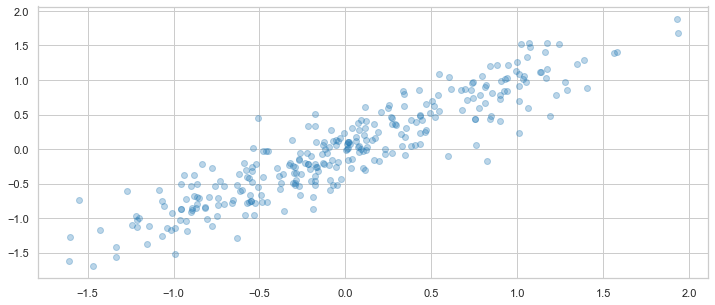

In [66]:
X1 = np.random.randn(300, 2)  # Random floats sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]]) # Transformation matrix
X2 = np.dot(X1, A)
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3) # alpha, transparency value, between 0 (transparent) and 1 (opaque).

We can create a linear model to explain the data

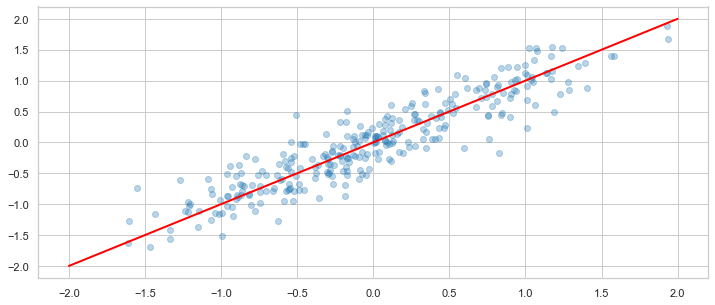

In [67]:
model=[0+1*x for x in np.arange(-2,3)] # np.arange returns evenly spaced values within a given interval.

plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
plt.plot(np.arange(-2,3), model,'r'); 
plt.show()
# The red line gives the predicted values of this model

But there are other linear models. 


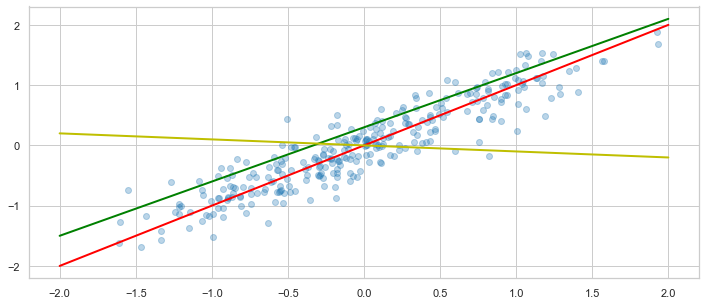

In [68]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
# We can use several parameters and we do not know which is the best model
model1=[0+1*x for x in np.arange(-2,3)]
model2=[0.3+0.9*x for x in np.arange(-2,3)]
model3=[0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r')
plt.plot(np.arange(-2,3), model2,'g')
plt.plot(np.arange(-2,3), model3,'y')


#### Which is the best model for a set of samples?


## Ordinary Least Squares

Consider the overdetermined system 

$$\textbf{y} = a_0+a_1 \textbf{x} $$

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the two $a$'s are chosen to minimize the sum of squared distance between the predicted values and the actual values. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.

## How to compute the OLS: Scipy.optimize

In [69]:
# To understand the use of zip in the next code:
list(zip([2,3,4,5,6],[40,50,60,70,80]))

[(2, 40), (3, 50), (4, 60), (5, 70), (6, 80)]

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(0, 20)

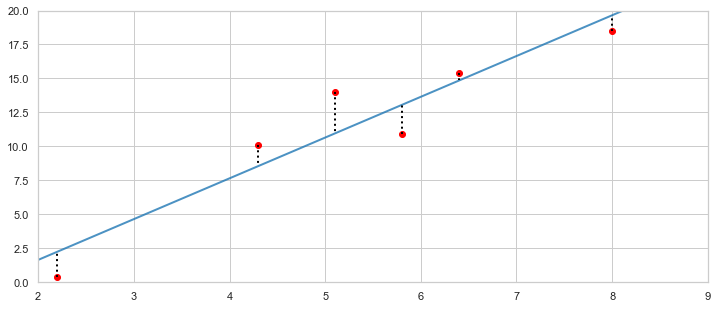

In [70]:
from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
 
# Minimize the sum of squares using a lambda function

sse = lambda b, x, y: np.sum((y - b[0] - b[1]*x) ** 2) # Store the sum of squared differences function
# Lambda function is a small anonymous function. 
# It can take any number of arguments, but can only have one expression. 
# Syntax "lambda arguments : expression"

b0,b1 = fmin(sse, [0,1], args=(x,y)); # Minimize the sum of squared differences
# [0,1] is the initial guess for b[0] and b[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain




The pointed black lines illustrate the vertical errors which are minimized.

**Note**: There are alternatives of errors-in-variables regression models as the **total least squares**.

We can minimize other criteria, such as the sum of absolute differences between the predicted values and the actual values (**sum of absolute errors (SAE)**). 

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77


(0, 20)

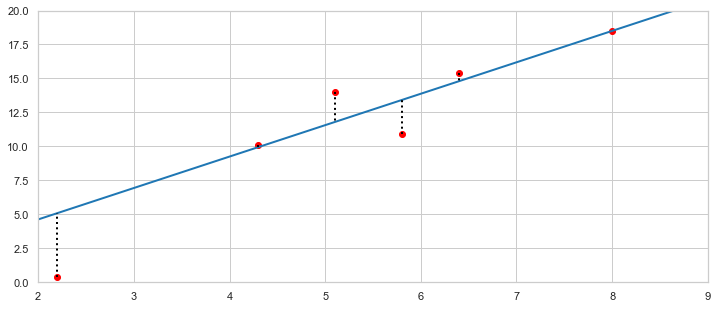

In [71]:
sabs = lambda b, x, y: np.sum(np.abs(y - b[0] - b[1]*x)) # Lambda function 
b0,b1 = fmin(sabs, [0,1], args=(x,y)) # Minimize the sum of absolute differences
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10]) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain

As you can see, in this case, far values are penalized less.

**OLS is a popular approach for several reasons**

+ It is computationally cheap to calculate the coefficients. 
+ It is easier to interpret than more sophisticated models. In situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. 
+ Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$$\widehat{\textbf{y}} = \widehat{a}_0+\widehat{a}_1 \textbf{x}$$

Here the hats on the variables represent the fact that they are estimated from the data we have available.

## Linear Regression Visualization: Seaborn

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot, provide the predictor and response variable names along with the dataset

### Example 1:  Macroeconomic dataset

To start with we load the Longley dataset of US macroeconomic data from the R datasets website.

In [135]:
import pandas as pd
# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Macroeconomic data from 1947 to 1962.

We will use the variable Total Derived Employment ('Employed') as our response $\textbf{y}$ and Gross National Product ('GNP') as our predictor $\textbf{x}$.


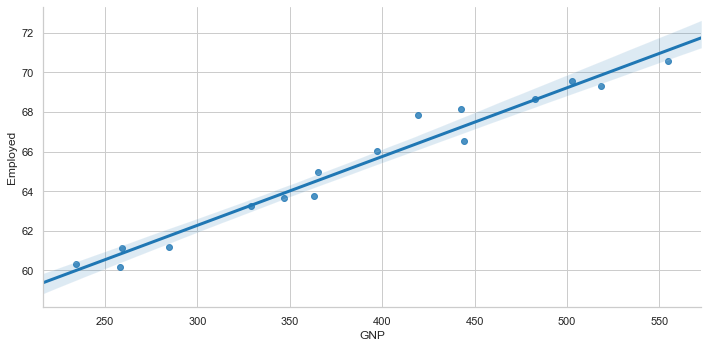

In [136]:
sns.lmplot("GNP", "Employed", df, aspect=2)

This plot has two main components. 

+ The first is a scatterplot, showing the observed datapoints. 
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model (using Bootstraping).

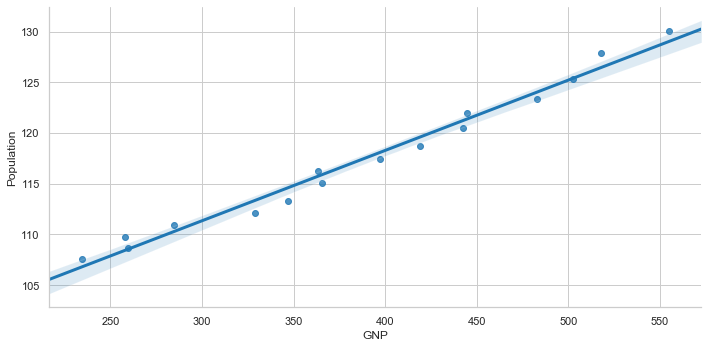

In [74]:
sns.lmplot("GNP", "Population", df, aspect=2);

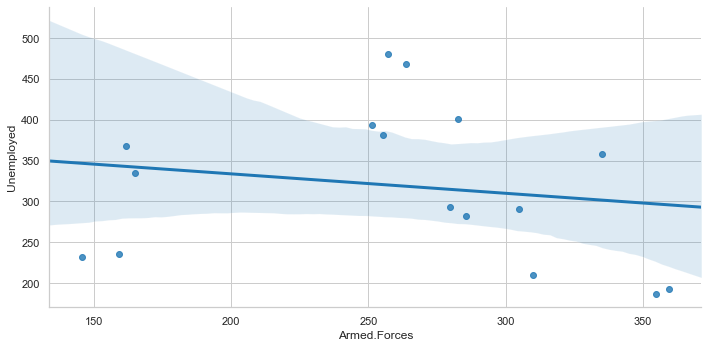

In [75]:
sns.lmplot("Armed.Forces", "Unemployed", df, aspect=2);

We can see signs of non linearity in the data which has not been captured by the model. 

In order to capture this non-linear effects, we have another type of regression known as polynomial regression. See below.

## Multiple Regression and Polynomial Regression
In Ordinary Least Squares Regression with a single variable we described the relationship between the predictor and the response with a straight line. This case is called *simple* linear regression. In the case of *multiple* linear regression we extend this idea by fitting a m-dimensional hyperplane to our m predictors.

$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_m \textbf{x}_m = X \textbf{w} $$


Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

This very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

Example:

<center><img src="files/images/overfitting.png" width = '700'></center>


We can represent a curved relationship between our variables by introducing **polynomial** terms, as for example, a cubic model:


$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$

To illustrate the multiple regression we will use a new example (see example 2 below). 

To illustrate the polynomial regression follow with the previous example 1 of Macroeconomic data:

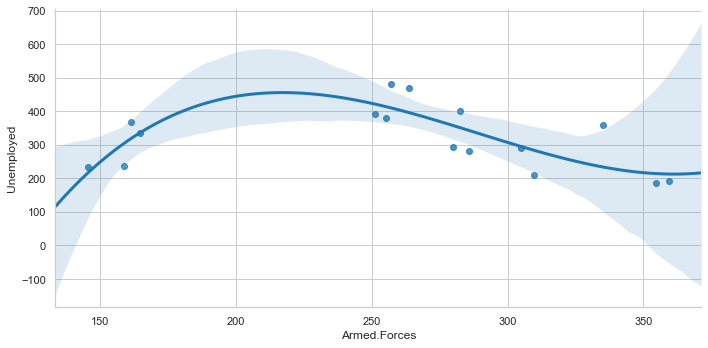

In [76]:
# Increase the order to estimate a polynomial regression
sns.lmplot("Armed.Forces", "Unemployed", df, order=3, aspect=2);

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>
Try to use higher order models to the fitting of GNP with Population.

</div>

In [77]:
# Your code here

### Example 2: Housing Data

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes.



To start with we load and visualize the data.

In [78]:
from sklearn import datasets
boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.
X_boston,y_boston = boston.data, boston.target # Create X matrix and y vector from the dataset.
print('Shape of data: {} {}'.format(X_boston.shape, y_boston.shape))

Shape of data: (506, 13) (506,)


Boston dataset has 506 instances and 13 attributes. 
Let's see the content of the dataset which are the keys the attributes or features and the general description:

In [79]:
print('keys: {}'.format(boston.keys()))
print('feature names: {}'.format(boston.feature_names))
print(boston.DESCR)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

Text(0, 0.5, 'count')

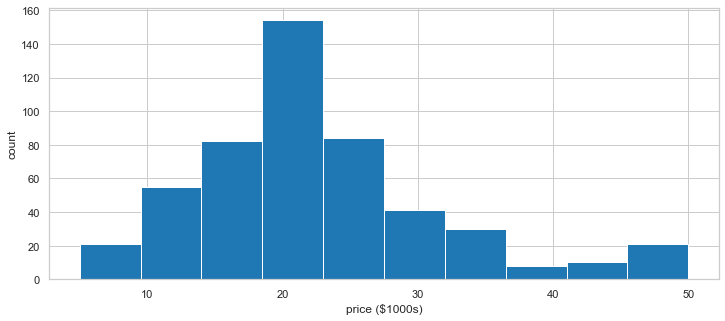

In [80]:
# Histogram of prices:
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".
Seaborn visualization can be used to show this linear relationships easily:

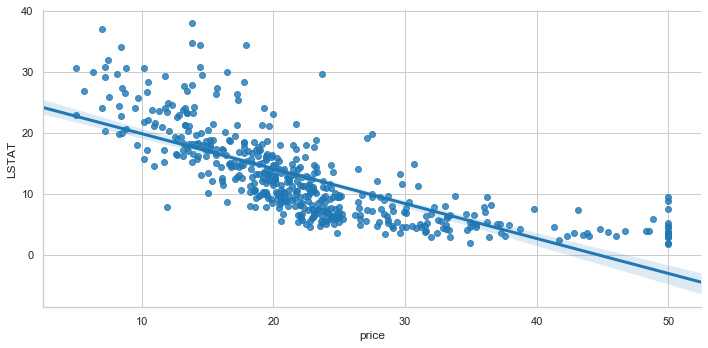

In [81]:
# Visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) # Create a DataFrame from the Boston dataset
df_boston['price'] = boston.target
sns.lmplot("price", "LSTAT", df_boston, aspect=2);

Is the relationship between the house price and ``lstat`` non-linear? Is the straight line a poor fit? Maybe a better fit can be obtained by including higher order terms:

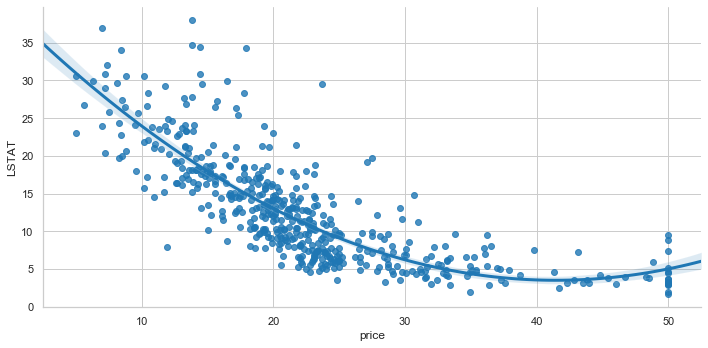

In [82]:
# Estimate a polynomial regression of order 2
sns.lmplot("price", "LSTAT", df_boston, order=2, aspect=2);

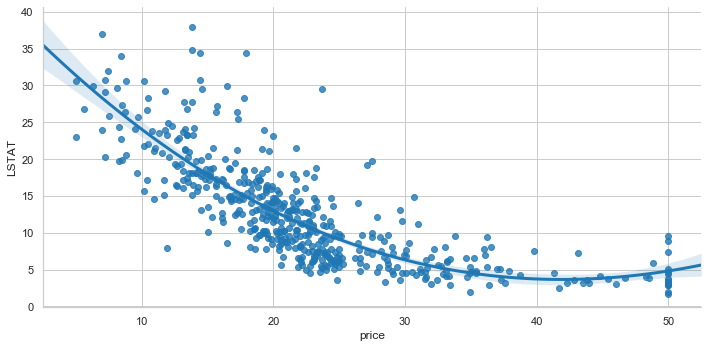

In [83]:
# Estimate a polynomial regression of order 3
sns.lmplot("price", "LSTAT", df_boston, order=3, aspect=2);

What if we consider variable RM or AGE?

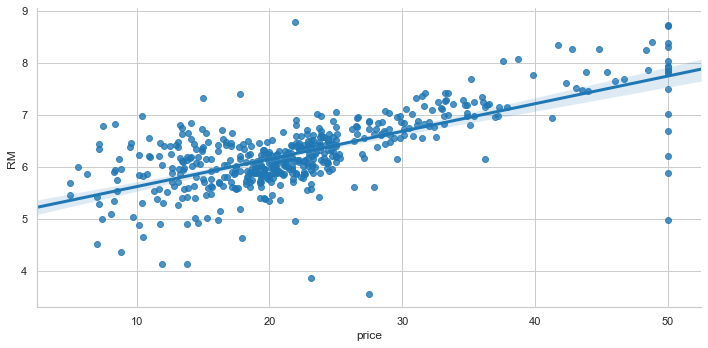

In [84]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot("price", "RM", df_boston, aspect=2);

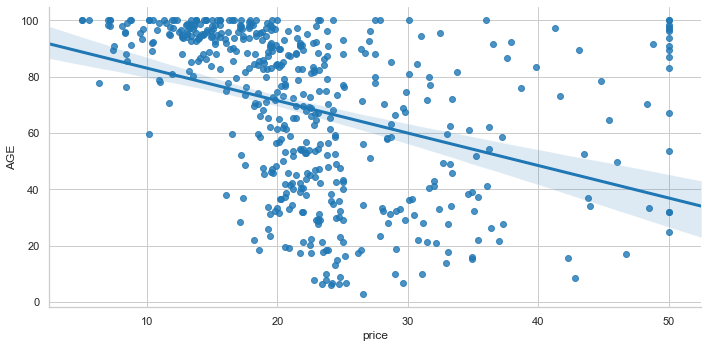

In [85]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot("price", "AGE", df_boston, aspect=2);

## More Visualizations

### Heatmap

We can also use corr and heatmap functions for studying the variables relationship, plotting a diagonal correlation matrix.

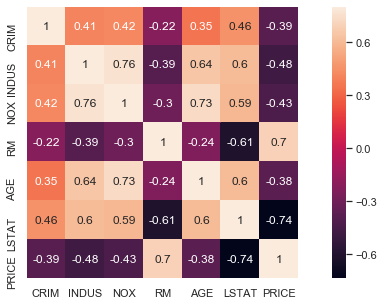

In [86]:
indexes=[0,2,4,5,6,12] # To plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df_boston2 = pd.DataFrame(boston.data[:,indexes], columns=boston.feature_names[indexes])
df_boston2['PRICE'] = boston.target
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

Using correlaton matrix heatmap we can observe that "RM" and "LSTAT" are the variables more correlated with "Price" (last row).

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Scatter plot matrix

Let's explore multiple variables relationships using a scatter plot matrix. The scatter plot is a grid of plots of multiple varaibles one against the other, showing the pairwise relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables:

In [87]:
print(boston.feature_names)
indexes3=[5,6,12]
print(boston.feature_names[indexes3])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['RM' 'AGE' 'LSTAT']


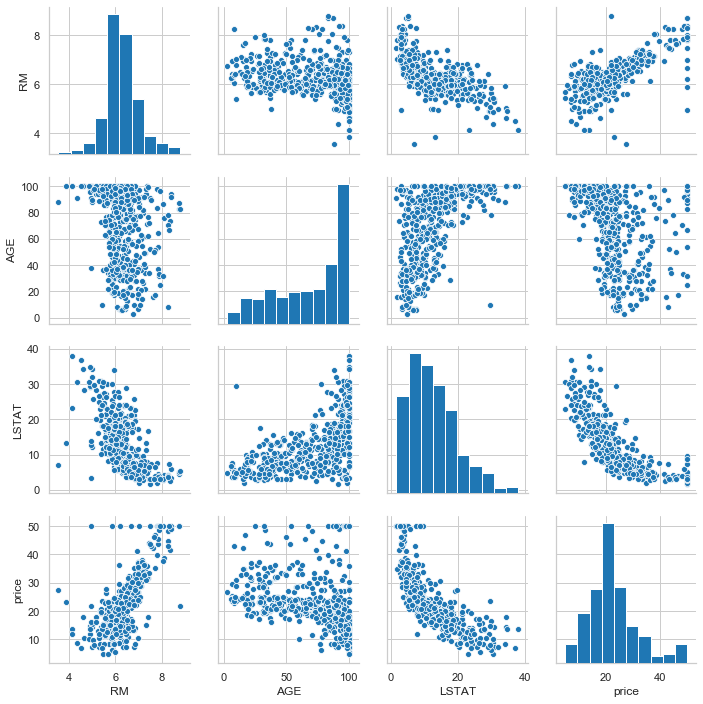

In [88]:
df_boston3 = pd.DataFrame(boston.data[:,indexes3], columns=boston.feature_names[indexes3])
df_boston3['price'] = boston.target
sns.pairplot(df_boston3) # Plot pairwise relationships in the dataset

We can visually analyze the pairwise relationships in the scatter plots. The diagonal axe contains a plot to show the univariate distribution of the data for the variable in that column.

You can create the same scatter plot matrix using the scatter_matrix method in pandas.tools.plotting:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f8e2240>,
      dtype=object)

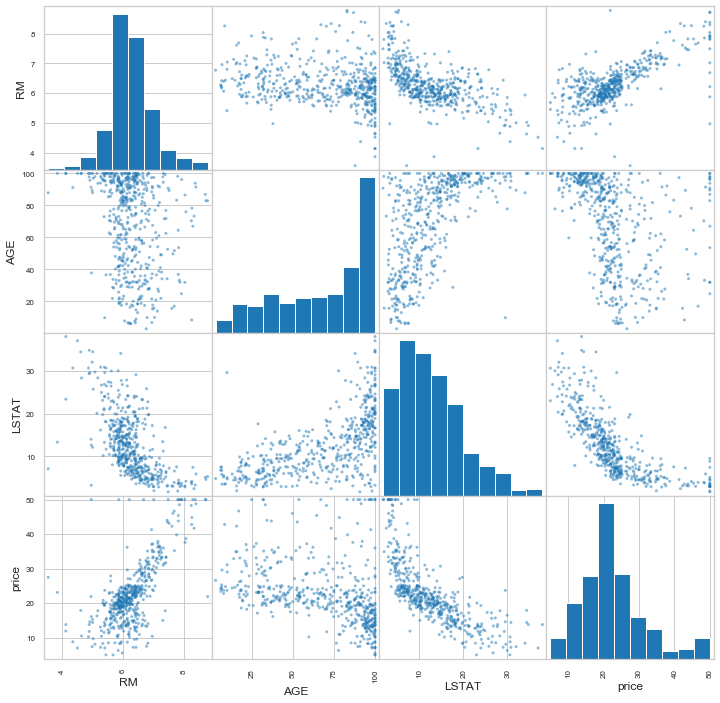

In [89]:
pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))  

## Prediction and quantitative evaluation

### Interpolation vs. extrapolation

In practice, when we do prediction for some value of x we haven’t seen before, we need to be very careful. Predicting $y$ for a value of $x$ that is within the interval of points that we saw in the original data (the data that we fit our model with) is called **interpolation**. Predicting y for a value of x that’s outside the range of values we actually saw for x in the original data is called **extrapolation**.
For real datasets, even if a linear fit seems appropriate, we need to be extremely careful about extrapolation, which can often lead to false predictions!


<center><img src="files/images/extrapolation.png"  width="500"></center>


### Prediction

Let's make predictions using **Scikit-learn**. 

Scikit-learn is a library that provides a variety of both supervised and unsupervised machine learning techniques. Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 

The <code>Estimator.fit</code> method sets the state of the estimator based on the *training data*. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called *feature matrix* and a one-dimensional numpy array $\textbf{y}$ that holds the *responses*. Some estimators allow the user to control the fitting behavior. 
Estimators that can generate predictions provide a ``Estimator.predict`` method. 
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\widehat{\textbf{y}}$. 

During the fitting process, the state of the estimator is stored in the instance attributes that have a trailing underscore (``'_'``). For example, the coefficients of a ``LinearRegression`` estimator are stored in the attribute ``coef_``. Let's see a toy example:

In [150]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # Create the Linear Regression estimator
X=[[0, 1], [1, 1], [2, 1]]
y=[0, 1, 2]
reg.fit(X, y)  # Perform the fitting
reg.coef_

array([1., 0.])

### Evaluation

We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.

The coefficient $R^2$ is defined as $(1 - \textbf{u}/\textbf{v})$, where $\textbf{u}$ is the residual sum of squares: $$\textbf{u}=\sum (\textbf{y} - \widehat{\textbf{y}} )^2$$ where ${\textbf{y}}$ is the observed response and $\widehat{\textbf{y}}$ is the predicted response.

And $\textbf{v}$ is the total sum of squares: $$\textbf{v}=\sum (\textbf{y} - \bar{\textbf{y}})^2,$$ where $\bar{\textbf{y}}$ is the mean of the observed data.

The best possible score for $R^2$ is 1.0 (when $\textbf{u}=0$): lower values are worse. $R^2$ is 0.0 when $\textbf{u}=\textbf{v}$.


**Let's continue with the Boston housing example**:

We will split the Boston data into training set and testing set:

In [91]:
train_size = np.floor(X_boston.shape[0]/2)
int(train_size)

253

In [92]:
X_boston.shape

(506, 13)

In [93]:
train_size = int(X_boston.shape[0]/2)
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Train and test sizes {} {}'.format(X_train.shape, X_test.shape))

regr_boston = LinearRegression()  # Create the Linear Regression estimator
regr_boston.fit(X_train, y_train) # Perform the fitting
print('Coeff and intercept: {} {}'.format(regr_boston.coef_, regr_boston.intercept_))

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Training Score: {}'.format(regr_boston.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_boston.score(X_test, y_test)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_boston.predict(X_train) - y_train)**2)))
print('Testing MSE: {}'.format(np.mean((regr_boston.predict(X_test) - y_test)**2)))

Train and test sizes (253, 13) (253, 13)
Coeff and intercept: [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.017430582945021
Training Score: 0.8557827200735684
Testing Score: -2.2527343423925306
Training MSE: 9.987517325463743
Testing MSE: 303.43686292658987


Note that the method score returns the coefficient of determination R^2 of the prediction.

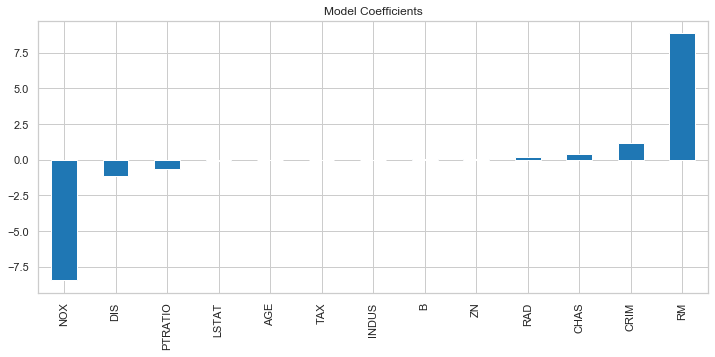

In [151]:
# Plotting model coefficients
from pandas import Series

coef = Series(regr_boston.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded.
Next, we will try to build a new model to predict the price using the most important factors and discarding the non-informative ones. To do this, we can create a LASSO regressor, forcing zero coefficients (see below).

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**EXERCISE 1: Climate Change and Sea Ice Extent**<p>

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow & Ice Data Center](https://nsidc.org).<p>

We perform the following processing steps:

</li>
<ol>
<ul>
</ul>
<li> We must read and clean the data.
<li> To compute the tendency for a given interval of time (month), we need to normalize the data.
<li> This values can be plotted for the entire time series or for particular months. 
<li> We can compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.
<li> We can also estimate the extent value for 2025.

</ol>
</div>

In [95]:
# Load the data and show the info and contents:
import pandas as pd
ice = pd.read_csv('files/ch06/SeaIce.txt',delim_whitespace=True)
print('shape: {}'.format(ice.shape))
ice.head() 

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92



To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend), before data cleaning.

In [96]:
# Your code here

### The importance of plotting

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties.

<center><img src="files/images/Anscombe's_quartet_3.svg"  width="600"></center>

Source [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).



## Regularization: Ridge and Lasso regression.

Ridge Regression penalizes the coefficients if they are too far from zero, thus enforcing them to be small in a continuous way. This way, it decreases model complexity while keeping all variables in the model. 

For that, Ridge regression adds a regularization term to the sum of squared errors of prediction (SSE). Given the set of samples $(X,\textbf{y})$, the objetive is to minimize:


$$ \textrm{$argmin$}_{\textbf{w}} \left( \frac{1}{2n}  || X \textbf{w} -  \textbf{y} ||^2_2 + \alpha || \textbf{w}||_p \right)$$
 
where $||\textbf{w}||_p$ is the $\ell_p$-norm of the parameter vector and p = 2 (Ridge). When p = 1 we have Lasso.


### Sparse models

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as *Lasso* (least absolute shrinkage and selection operator) to set some model coefficients to zero (thereby discarding those variables). Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.


### Geometric interpretation of regularization

The left panel shows L2 regularization (ridge regularization) and the right panel L1 regularization (Lasso regression). The ellipses indicate the distribution for no regularization. The blue lines show the constraints due to regularization (limiting $\theta^2$ for ridge regression and $|\theta|$ for Lasso regression). The corners of the L1 regularization create more opportunities for the solution to have zeros for some of the weights.


<center><img src="files/images/regularization_ridge_lasso.png"></center>


### Ridge


In [97]:
regr_ridge = linear_model.Ridge(alpha=.3) # Create a Ridge regressor
regr_ridge.fit(X_train, y_train)  # Perform the fitting

Ridge(alpha=0.3)

In [98]:
print('Coeff and intercept: {} {}'.format(regr_ridge.coef_,  regr_ridge.intercept_))

Coeff and intercept: [ 1.02306982e+00  2.46624258e-02 -3.35255156e-04  4.32153462e-01
 -5.44287640e+00  8.87526668e+00 -4.93894389e-02 -1.07418749e+00
  1.98215897e-01 -1.61729094e-02 -6.39546558e-01  1.80886392e-02
 -1.21115342e-01] -11.836790865166353


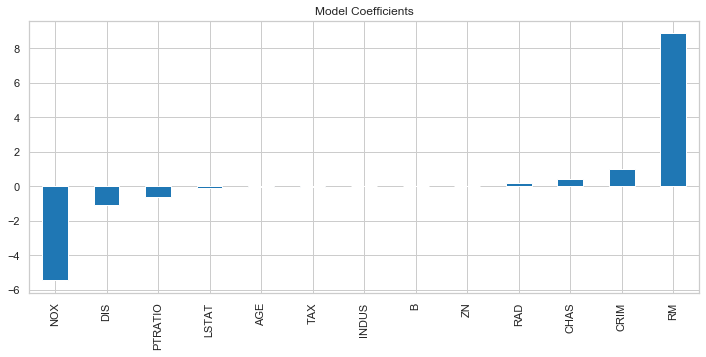

In [99]:
coef = Series(regr_ridge.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [100]:
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_ridge.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_ridge.score(X_test, y_test)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_ridge.predict(X_train) - y_train)**2)))
print('Test MSE: {}'.format(np.mean((regr_ridge.predict(X_test) - y_test)**2)))

Training Score: 0.8554986478280451
Testing Score: -1.5272153871196918
Training MSE: 10.007190255609803
Test MSE: 235.75559153821155


### Lasso


In [101]:
regr_lasso = linear_model.Lasso(alpha=.3) # Create a Lasso regressor
regr_lasso.fit(X_train, y_train)  # Perform the fitting


Lasso(alpha=0.3)

Coeff and intercept: [ 0.          0.01996512 -0.          0.         -0.          7.69894744
 -0.03444803 -0.79380636  0.0735163  -0.0143421  -0.66768539  0.01547437
 -0.22181817] -6.18324183614838


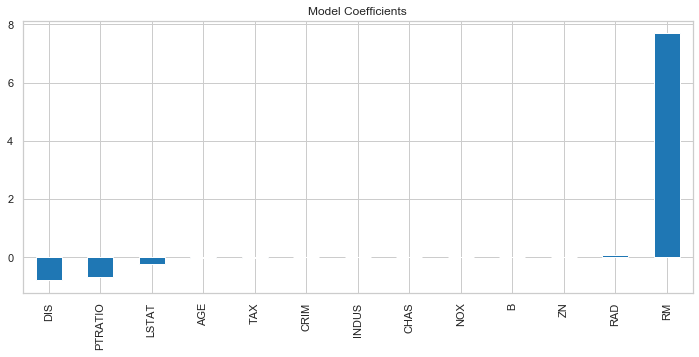

In [102]:
print('Coeff and intercept: {} {}'.format(regr_lasso.coef_,  regr_lasso.intercept_))
coef = Series(regr_lasso.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [103]:
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_lasso.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_lasso.score(X_test, y_test)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_lasso.predict(X_train) - y_train)**2)))
print('Test MSE: {}'.format(np.mean((regr_lasso.predict(X_test) - y_test)**2)))

# Are the coeficients now sparse?
# Is the score different?

Training Score: 0.8449992039829642
Testing Score: 0.5011275290212163
Training MSE: 10.734311009544223
Test MSE: 46.53816809487564


Now, it can be seen that the result of the model fitting for a set of sparse coefficients is much better than before (using all the variables), with the score increasing from -2.25 (LR) and -1.52 (Ridge) to 0.50. This demonstrates that four of the initial variables are not important for the prediction and in fact, they confuse the regressor.

In [104]:
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [105]:
print('Max price {}, min price {}, and mean price {}'.format(np.max(boston.target), np.min(boston.target), np.mean(boston.target)))

Max price 50.0, min price 5.0, and mean price 22.532806324110677


In [106]:
ind=np.argsort(np.abs(regr_lasso.coef_))
print('Order variable (from less to more important): {}'.format(boston.feature_names[ind]))

Order variable (from less to more important): ['CRIM' 'INDUS' 'CHAS' 'NOX' 'TAX' 'B' 'ZN' 'AGE' 'RAD' 'LSTAT' 'PTRATIO'
 'DIS' 'RM']


In [107]:
indexes_non_selected=[0,2,3,4]
print('Non important variable: {}'.format(boston.feature_names[indexes_non_selected]))
most_important_index=[5]
print('Most important variable: {}'.format(boston.feature_names[most_important_index]))

Non important variable: ['CRIM' 'INDUS' 'CHAS' 'NOX']
Most important variable: ['RM']


We can also select the most important features with sklearn:

In [108]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func=fs.f_regression,k=5)
X_new = selector.fit(X_train,y_train)
list(zip(selector.get_support(), boston.feature_names)) # Show the selected features

[(False, 'CRIM'),
 (False, 'ZN'),
 (True, 'INDUS'),
 (False, 'CHAS'),
 (False, 'NOX'),
 (True, 'RM'),
 (True, 'AGE'),
 (False, 'DIS'),
 (False, 'RAD'),
 (False, 'TAX'),
 (True, 'PTRATIO'),
 (False, 'B'),
 (True, 'LSTAT')]

The set of selected features is now different, since the criterion has changed. However, three of the most important features are among them: 'RM', 'PTRATIO' and 'LSTAT'.


**Plots for the fitting evaluation:**

We can often learn a lot about how well our model did by analyzing the predictions and residuals with two interesting plots: 
- An scatter plot of the observed values $y$ versus the predicted value $\hat y$ 
- An scatter plot residuals $y_i - \hat y_i$ vs. $\hat y_i$.

In both cases we can add a line to show which would be the perfect result. 

Text(0, 0.5, 'Predicted price ($1000s)')

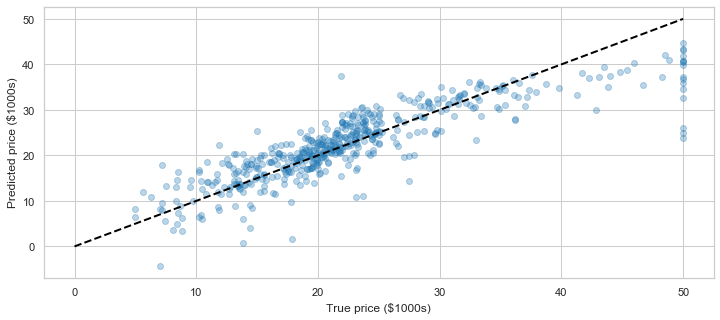

In [109]:
regr_boston_all = LinearRegression() # Create the Linear Regression estimator
regr_boston_all.fit(boston.data, boston.target) # Fitting with all the data (not just the training data) and all the features
predicted = regr_boston_all.predict(boston.data) # Perform prediction of all the data

# Visualization of target and predicted responses of the boston data:
plt.scatter(boston.target, predicted, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0, 0.5, '$y - \\hat y$')

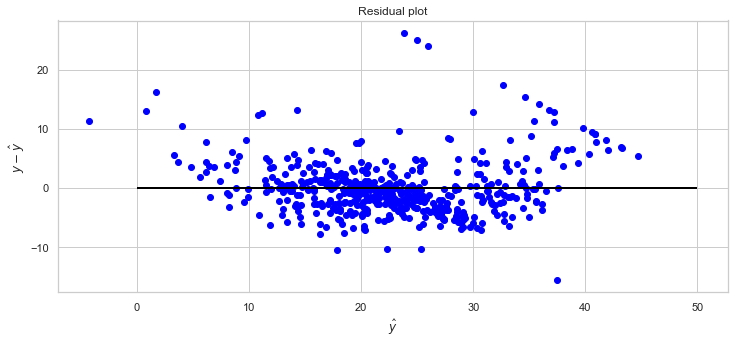

In [156]:
x_plot = plt.scatter(predicted, (boston.target-predicted), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')
plt.xlabel('$\hat y$')
plt.ylabel('$y - \hat y$')

Intuitively, if the model is good, then a plot of the residuals ($y_i - \hat y_i$) against the fitted values (\hat y_i) should look like noise (i.e., there shouldn't be any visible patterns).

Model evaluation:

In [111]:
print('Score: {}'.format(regr_boston_all.score(boston.data, boston.target)))  # Best possible score is 1.0, lower values are worse.

Score: 0.7406426641094095


In [112]:
# Score using a single feature
regr_feat1 = LinearRegression()
for i in np.arange(13):
    feat1=X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature: {}'.format(boston.feature_names[i]))
    print('Score: {}'.format(regr_feat1.score(feat1, y_train)))

Feature: CRIM
Score: 0.05024843836202264
Feature: ZN
Score: 0.10206594240694722
Feature: INDUS
Score: 0.13068434569181497
Feature: CHAS
Score: 0.00018610373661331892
Feature: NOX
Score: 0.11130139266941119
Feature: RM
Score: 0.7699004053318655
Feature: AGE
Score: 0.11300215206715913
Feature: DIS
Score: 0.018087821597697507
Feature: RAD
Score: 0.0015003535946076507
Feature: TAX
Score: 0.05512205417475469
Feature: PTRATIO
Score: 0.13721073435814335
Feature: B
Score: 0.0463878641534512
Feature: LSTAT
Score: 0.5035503901281464


### Transform and Predict 

There is a special type of ``Estimator`` called ``Transformer`` which transforms the input data -- e.g. selects a subset of the features or extracts new features based on the original ones.

One transformer that we will use here is ``sklearn.preprocessing.StandardScaler``. This transformer centers each predictor in ``X`` to have zero mean and unit variance and is useful.

In [113]:
y_train.shape

(253,)

In [114]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train) # Create the transformer StandardScaler and perform the fitting for the training data

y_train2 = np.expand_dims(y_train, axis=1) # Expand the shape of the array from (253,) to (253, 1).
scalery = StandardScaler().fit(y_train2) # Create the transformer StandardScaler and perform the fitting for the target

print("\nBefore transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(y_train), np.min(y_train), np.mean(y_train), np.var(y_train)))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(y_test), np.min(y_test), np.mean(y_test), np.var(y_test)))


# Normalization of train and test data using mean and variance of the training:
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train2)
X_test = scalerX.transform(X_test)
y_test2 = np.expand_dims(y_test, axis=1)
y_test = scalery.transform(y_test2)

print("\nAfter transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(y_train), np.min(y_train), np.mean(y_train), np.var(y_train)))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(y_test), np.min(y_test), np.mean(y_test), np.var(y_test)))


Before transformation:
Training: Max 50.0, min 11.8, mean 24.307509881422927, and var 69.25326375978378
Testing: Max 50.0, min 5.0, mean 20.75810276679842, and var 93.28670311987378

After transformation:
Training: Max 3.0873514853387736, min -1.5029714532177498, mean -2.808469311304744e-16, and var 1.0
Testing: Max 3.0873514853387736, min -2.3200970024895917, mean -0.4265163585480787, and var 1.3470369200714334


Another good practice is to shuffle the data before divide it into train and test.

## Statistical evaluation

The ``statsmodels`` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, p)`` where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

In [115]:
import statsmodels.api as sm
X2 = X_boston[:,12] # Let's use column 12 (LSTAT) to perform a regression:
X12 = sm.add_constant(X2)  # Adds a constant term to the predictor
est = sm.OLS(y_boston, X2) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Mon, 23 Nov 2020   Prob (F-statistic):                    2.71e-67
Time:                        12:56:28   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 2: Advertising dataset**<p>


In the following example we will use the [advertising dataset](https://www.kaggle.com/purbar/advertising-data/data)which consists of the sales of products and their advertising budget in three different media TV, radio, newspaper.<p>

**Is there a linear relationship between the sales of products and the advertising budget in TV, radio or newspapers?**<p>


Dataset from the book: "An Introduction to Statistical Learning with Applications in R”. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.<p>


</div>

In [116]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
file = 'files/ch06/Advertising.csv'
df_adv = pd.read_csv(file, index_col=0)

X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


We can show this for two predictor variables in a three dimensional plot. 

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<Figure size 864x360 with 0 Axes>

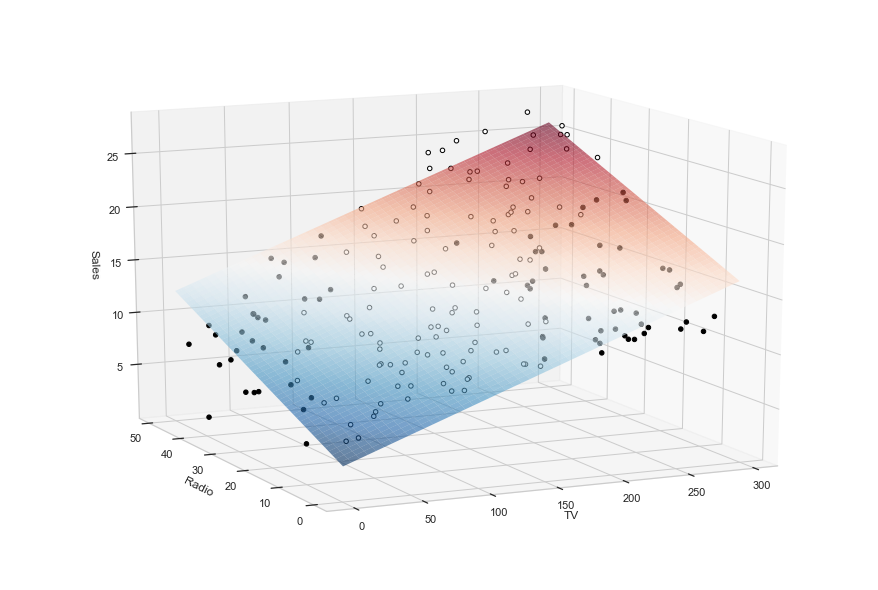

<Figure size 864x360 with 0 Axes>

In [117]:
from mpl_toolkits.mplot3d import Axes3D

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot 
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15) # azim, stores the azimuth angle in the x,y plane; elev, stores the elevation angle in the z plane 

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0) # cmap, a colormap for the surface patches.
# linewidth=0, allows not drawing lines on the surface

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.figure()

Explore relations using scatter plot matrix and extract some conclusions

In [118]:
# your code here


Your conclusions here:


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 3** Diabetes <p>

The diabetes dataset (from scikit-learn) consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.<p>

We will explore the performance of Linear Regression model, Rigde and Lasso model for prediction.<p>

Fill the gaps of the exercise.

</div>

In [119]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target
print(X.shape, y.shape)

(442, 10) (442,)


In [120]:
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=1)

Divide in training and testing sets and evaluate the prediction (using sklearn) with a simple and a multiple regression model:

For the simple model, first choose one of the dimensions of the data.

In [121]:
# Your code here

Visualize the data using scatter plot (plt.scatter):

In [122]:
# Your code here

Divide in training and testing sets and evaluate the prediction (sklearn) without and with LASSO regularization:

In [123]:
# Your code here

Visualize the data using scatter plot (plt.scatter) and two different colors for train and test data:

In [124]:
# Your code here

Train and evaluate the score of the test set.

In [125]:
# Your code here

Calculate the Mean Squared Error on the train and test set:

In [126]:
# Your code here

Visualize the predicted line together with a scatter plot of the training set.

In [127]:
# Your code here

Visualize the predicted line together with a scatter plot of the training set.

In [128]:
# Your code here

For multiple regression model divide in training and testing sets and evaluate the prediction (sklearn) without and with LASSO regularization.

In [129]:
# Your code here

Is the score improving using all 10 variables?

Try ridge regressor.

In [130]:
# Your code here

Now, with a sparse model:

In [131]:
# Your code here

Is the score different? Extract some conclusions.

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 4: The Big Mart Sales** <p>

Use the [Big Mart Sales dataset](https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data). In the data set, we have product wise Sales for Multiple outlets of a chain. 

In particular, we can see characteristics of the sold item (fat content, visibility, type, price) and some characteristics of the outlet (year of establishment, size, location, type) and the number of the items sold for that particular item. Let’s see if we can predict sales using these features.


Implement the following analysis:
<ul>
    <li> Read the train and test files in a pandas DataFrame
    <li> Clean the data (some missing values are present)    
    <li> Convert categorical variables into numeric values and exclude 'Item_Identifier' and 'Item_Outlet_Sales' (which is the target).
    <li> Study which are the variables with the highest (lowest) correlation with the target variable.
    <li> Apply linear regression using all features.
    <li> Build the residual plot and give an interpretation of it 
    <li> Choose a polynomial regression model to better fit the data.
    <li> Compare ridge and lasso regressors.  
    <li> Compare the magnitude of coefficients of the different models
    <li> Estimate which are the best features for prediction.
</div>

In [132]:
# Load data:
train = pd.read_csv('files/ch06/bigmart-sales-data/Train.csv')

test = pd.read_csv('files/ch06/bigmart-sales-data/test.csv')

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [133]:
# Your solution here

## Logistic Regresion (Scikit-learn)

**Logistic regression** or logit regression is a type of probabilistic statistical classification model. It is also used to predict a binary response from a binary predictor, used for predicting the outcome of a dichotomous dependent variable (i.e., a class label) based on one or more predictor variables (features). 

(Source: *Wikipedia*)

The logistic function is:

$$ f(x) = \frac{1}{1+e^{- \lambda x}}$$

The logistic function is useful because it can take an input with any value from negative infinity to positive infinity, whereas the output  is confined to values between 0 and 1 and hence is interpretable as a probability.

In [ ]:
def logist(x,l):
    return 1/(1+np.exp(-l*x))

x = np.linspace(-10,10) # 50 points equally spaced from -10 to 10
t = logist(x,0.5)
y = logist(x,1)
z = logist(x,3)
plt.plot(x,t, label='lambda=0.5')
plt.plot(x,y, label='lambda=1')
plt.plot(x,z, label='lambda=3')
plt.legend(loc='upper left')



In logistic regression the variable x is viewed as a linear function of an explanatory variable x_1, as follows:
$$ f(x) = \frac{1}{1+e^{- \lambda (a_0 + a_1 x_1)}}$$

In [ ]:
from sklearn import linear_model

xmin, xmax = -10, 10
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples) # Creates 100 random numbers from a normal distribution.
y = (X > 0).astype(np.float) # y contains 0 for the negative X and 1 for the positive X.
X = X[:, np.newaxis] 

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)

X_test = np.linspace(-10, 10, 300)

# Plot the regression line in blue:
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color='blue', linewidth=2, label='linear model')


# Logistic Regression:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, y)

def lr_model(x):
    return 1 / (1 + np.exp(-x))

loss = lr_model(X_test * logreg.coef_ + logreg.intercept_).ravel() # ravel - in column array
# Equivalent to loss = logreg.predict_proba(X_test[:, np.newaxis]), which gives the probability estimates.

plt.plot(X_test, loss, color='red', linewidth=2, label='log reg') # Plot the logistic regression fitting in red

plt.axhline(0.5, color='grey') # Plot horizontal axis in 0.5

plt.scatter(X, y, color='black') # Scatter plot of the data points in black

plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-4, 4)



<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 4: Winning or Losing Football Team** <p>

We want to predict victory or defeat in a football match when we are given the number of goals a team scores.
To do this we consider the set of results of the football matches from the Spanish league and we build a classification model with it. <p>

We follow the steps:
<ul>
    <li> Read this file in a pandas DataFrame: http://www.football-data.co.uk/mmz4281/1213/SP1.csv
    <li> Select these columns in a new DataFrame: 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR'. (FTHG: Home team goals, FTAG: Away team goals, FTR: H=Home Win, D=Draw, A=Away Win)
    <li> Visualize a scatter plot of FTHG versus FTAG.
    <li> Built a $X$ 1-d predictor with all scores and a $y$ binary variable indicating win or loss.
    <li> Compute and visualize a logistic regression. 
    <li> Which is the cut value?

</div>

In [158]:
import pylab as pl

# Season 2012/2013
file = 'files/ch06/SP1.csv' # file = 'http://www.football-data.co.uk/mmz4281/1213/SP1.csv'
footballData = pd.read_csv(file)
s = footballData[['HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR']]

In [159]:
s.head() # (H=Home Win, D=Draw, A=Away Win)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Celta,Malaga,0,1,A
1,Mallorca,Espanol,2,1,H
2,Sevilla,Getafe,2,1,H
3,Ath Bilbao,Betis,3,5,A
4,Barcelona,Sociedad,5,1,H


Can we predict if we have a win or loss if we are given a score?

To answer this question, we can follow the steps:
* Visualization with scatter plot the number of goals with transparecy (alpha channel).
* Create two extra columns containing 'W' the number of goals of the winner and 'L' the number of goals of the losser
* Create the data and target: concatenate the number of goals of the winner and the number of goals of the losser
* Plot the 2-dimensional data
* Fitting of a Logistic Regression and prediction using the model
* Estimate which is the cut off value.

In [157]:
# Your solution here